## Задание по библиотекам Pandas и Matplotlib
### Лабораторная работа № 4 по дисциплине "Технологии программирования"

Вариант 5

Подключаем необходимые библиотеки:

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

Скачиваем датасет с информацией о пассажирах Титаника:

In [4]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv

"wget" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Проверяем наличие скачанного датасета:



In [3]:
!ls

"ls" �� ���� ����७��� ��� ���譥�
��������, �ᯮ��塞�� �ணࠬ��� ��� ������ 䠩���.


Значения колонок датасета следующие (__в соответствии с информацией с сайта__):
*    Survived Indicator (выжил пассажир или нет)
*    Passenger Class (класс)
*    Name (имя)
*    Sex (пол)
*    Age (возраст)
*    Siblings/Spouses Aboard (есть ли братья, сестры или супруг(а) на борту)
*    Parents/Children Aboard (есть ли родители или дети на борту)
*    Fare paid in £s (цена билета в фунтах стерлингов)

Загружаем данные и формируем Pandas DataFrame:

In [222]:
df = pd.read_csv('titanic.csv')
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


__С использованием датафрейма нужно выполнить следующие задания__.

1. Определите, содержит ли какой-нибудь столбец датасета пропущенные значения.

In [223]:
# Общая информация о датасете
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [224]:
# Количество пропущенных значений в каждой столбце
df.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

2. В соответствии с вариантом, определите:

   1. Количество женщин старше 50 лет на борту.
   2. Количество пассажиров, путешествующих вторым классом вместе с родителями или детьми.
   3. Число погибших детей в возрасте до 12 лет, путешествующих первым классом.
   4. Среднее значение коэффициента выживаемости десяти пассажиров третьего класса с самыми дорогими билетами.
   5. Среднее значение цены билета пассажиров, путешествующих без родственников.

In [225]:
# Среднее значение цены билета пассажиров, путешествующих без родственников.
price_mean_no_parents = df.loc[df['Parents/Children Aboard'] == 0, 'Fare'].mean()
print(price_mean_no_parents)

25.68069866468843


3. Постройте диаграмму распределения значений цены билета по всем пассажирам. Проинтерпретируйте результат. Можно ли сказать, что в данных наблюдаются выбросы?

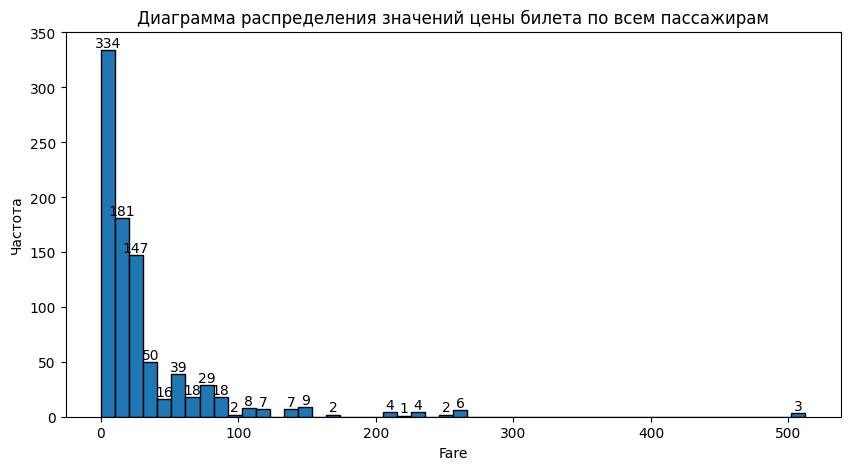

In [226]:
plt.figure(figsize=(10, 5))
n, bins, patches = plt.hist(df['Fare'], bins=50, edgecolor='black')
for i in range(len(bins) - 1):
    if n[i]>0:
        plt.text(bins[i] + (bins[i + 1] - bins[i]) / 2, n[i], str(int(n[i])), ha='center', va='bottom')
plt.title('Диаграмма распределения значений цены билета по всем пассажирам')
plt.xlabel('Fare')
plt.ylabel('Частота')
plt.show()

<b>Вывод: </b> На основе предоставленных данных можно наблюдать выброс у билетов дороже 500 фунтов

4. В соответствии с вариантом, определите, верны ли следующие утверждения. Приведите доказательства ответа.

    1. Чем дороже билет, тем выше вероятность выжить.
    2. Мужчинам в катастрофе выжить проще.
    3. Чем больше родственников у человека, тем выше шанс того, что он купит билет третьего класса.
    4. Если Вам больше 70 лет, то шансов выжить в катастрофе у Вас практически нет.
    5. Чем больше родственников у человека, тем выше его шанс погибнуть.

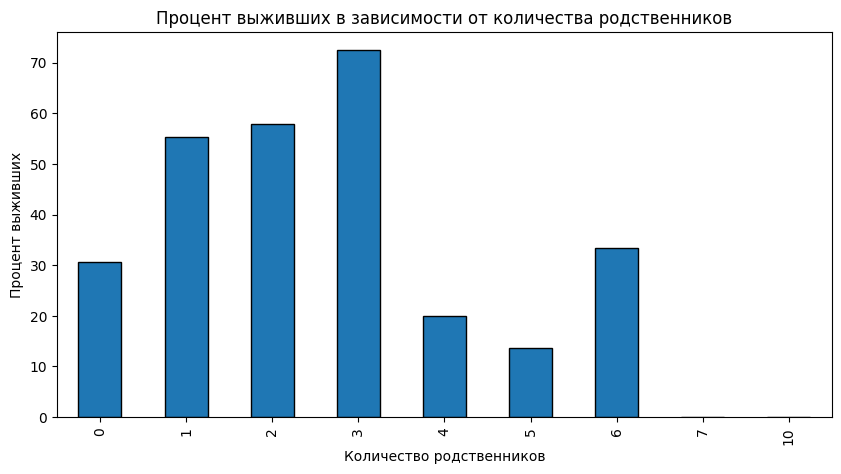

In [227]:
# Представим, что в понятие "родственники" входят как родители так и братья с сестрами
# Создадим группу, которая объединит эти два столбца
df['Relatives'] = df['Siblings/Spouses Aboard'] + df['Parents/Children Aboard']

#Чтобы просчитать шанс гибели человека, надо сгруппировать данные о родственниках по уникальным значениям
# Для каждой уникальной группе количества родственников выберем столбец Survived, который будет хранить информацию о выживаемости
# Высчитаем среднее значение выживших и получаем процент выживания для каждой группе количества родственников
grouped_data = df.groupby('Relatives')['Survived'].mean() * 100
plt.figure(figsize=(10, 5))

# построение диаграммы 
grouped_data.plot(kind='bar', edgecolor='black')
plt.title('Процент выживших в зависимости от количества родственников')
plt.xlabel('Количество родственников')
plt.ylabel('Процент выживших')
plt.show()

<b> Вывод: </b> по данному графику нельзя сделать четкий вывод о правдивости этого утверждения. С ростом количества родственников до 3 можем наблюдать рост процента "выживаемости", однако далее эта прогрессия прекращается, как и логика в том, что уже при 4 родственниках процент "выживания" крайне мал    

5. Столбец с именем пассажиров вряд ли будет иметь значение для последующего анализа данных. Удалите этот столбец из датафрейма. Выведите на экран полученный датасет.

In [228]:
df = df.drop(['Name'], axis=1)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,1
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,1
4,0,3,male,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,0
883,1,1,female,19.0,0,0,30.0000,0
884,0,3,female,7.0,1,2,23.4500,3
885,1,1,male,26.0,0,0,30.0000,0


6. Столбец "пол пассажира" является категориальным. Закодируйте его с помощью ohe-hot-кодирования (OHE). Выведите на экран полученный датасет.

In [229]:
df_onehot = pd.get_dummies(df, columns=["Sex"], prefix="Sex")
df_onehot

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Relatives,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,1,False,True
1,1,1,38.0,1,0,71.2833,1,True,False
2,1,3,26.0,0,0,7.9250,0,True,False
3,1,1,35.0,1,0,53.1000,1,True,False
4,0,3,35.0,0,0,8.0500,0,False,True
...,...,...,...,...,...,...,...,...,...
882,0,2,27.0,0,0,13.0000,0,False,True
883,1,1,19.0,0,0,30.0000,0,True,False
884,0,3,7.0,1,2,23.4500,3,True,False
885,1,1,26.0,0,0,30.0000,0,False,True


7. Постройте диаграмму рассеяния между признаками "Возраст" и "Цена билета". Проинтерпретируйте ответ.

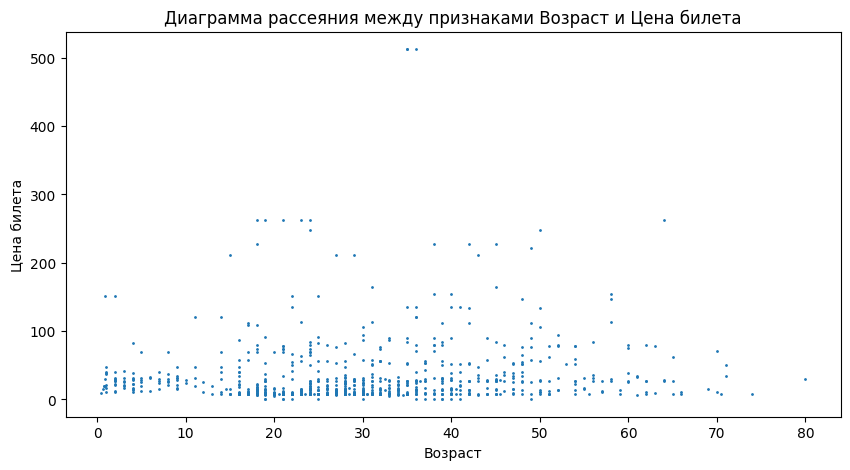

In [230]:
# Ваш код
plt.figure(figsize=(10, 5))
plt.scatter (df['Age'], df['Fare'], s=1)
plt.title('Диаграмма рассеяния между признаками Возраст и Цена билета')
plt.xlabel('Возраст')
plt.ylabel('Цена билета')
plt.show()

<b>Вывод: </b> диаграмма рассеяния между признаками показала, что корреляции между возрастом и ценой билета нет. Едиственное есть небольшой рост цены билетов у возрастной группы примерно от 20 до 25 и от 40 до 50, что, например, может символизировать желание провести время путешествия в более комфортных условиях 

8. Отнормируйте значения признаков "Возраст" и "Цена билета". Выведите на экран полученный датасет.

In [231]:
# объект sklearn для нормолизации
scaler = MinMaxScaler()

# 1. обучение и вычислеение среднего и стандартного отклонения для стандартизации 
# 2. преобразование данных
df_minmax = scaler.fit_transform(df[['Age', 'Fare']])
df_minmax

array([[0.27117366, 0.01415106],
       [0.4722292 , 0.13913574],
       [0.32143755, 0.01546857],
       ...,
       [0.08268409, 0.04577135],
       [0.32143755, 0.0585561 ],
       [0.39683338, 0.01512699]])

9. Постройте гистограммы распределения пассажиров по полу и по возрасту для каждого класса. Расположите гистограммы одна под другой. Оси абсцисс должны быть однаковыми.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


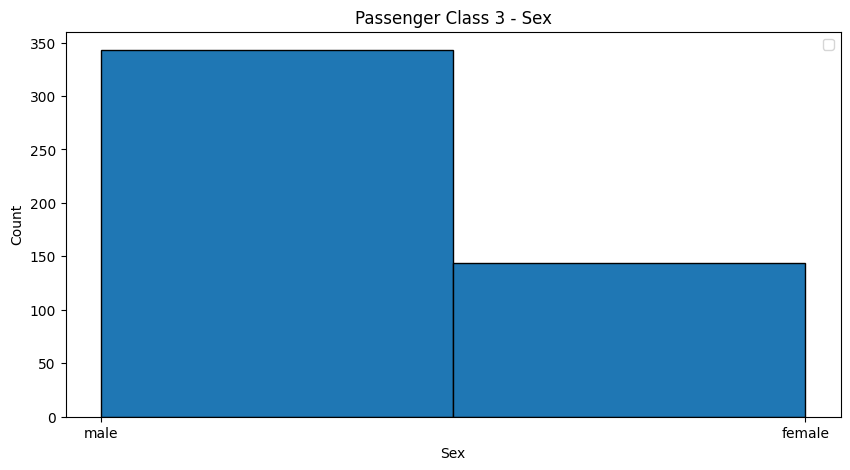

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


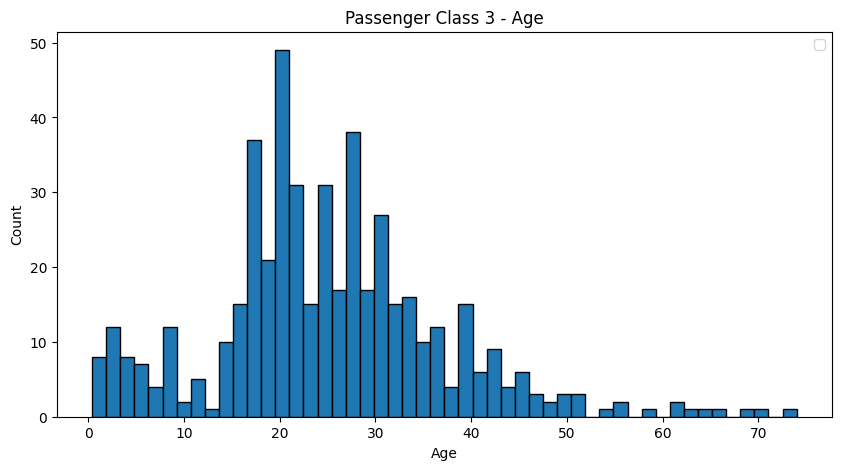

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


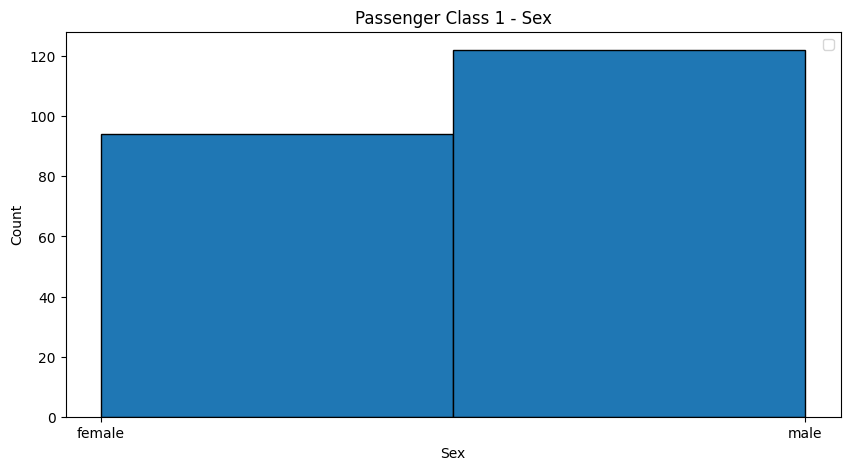

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


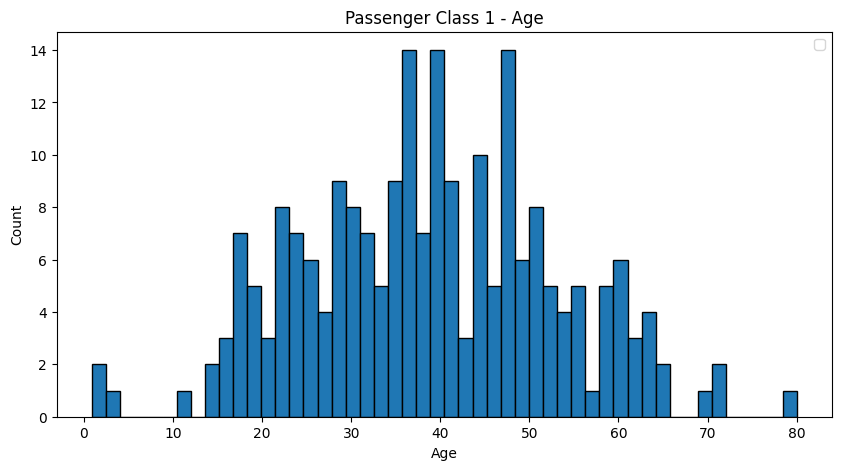

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


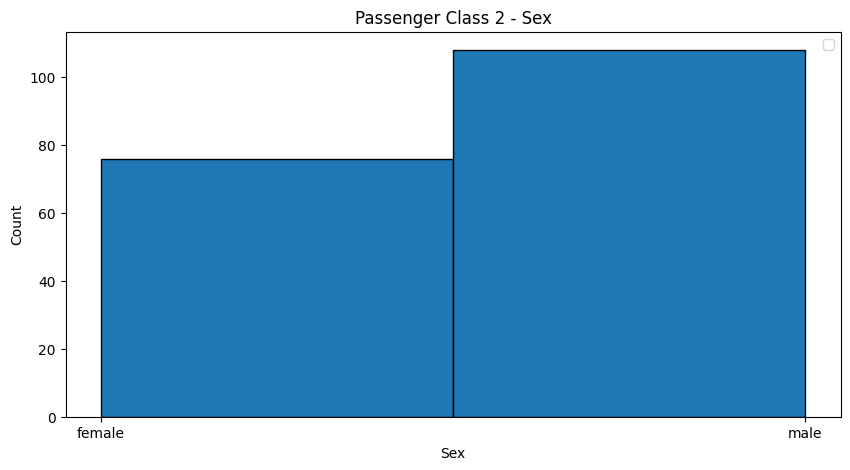

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


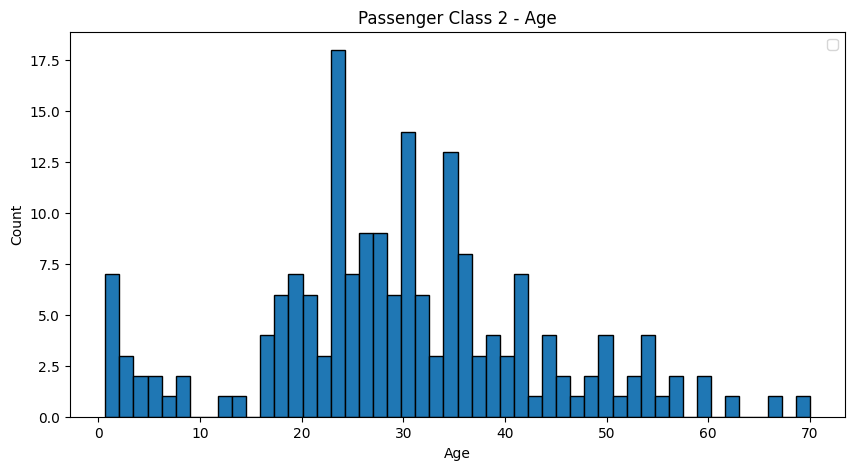

In [233]:
for pclass in df['Pclass'].unique():
    plt.figure(figsize=(10, 5))
    # Фильтрация данных по классу
    df_filtered = df[df['Pclass'] == pclass]
    
    plt.hist(df_filtered['Sex'], bins=2, edgecolor='black')
    plt.title(f'Passenger Class {pclass} - Sex')
    plt.xlabel('Sex')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.hist(df_filtered['Age'], bins=50, edgecolor='black')
    plt.title(f'Passenger Class {pclass} - Age')
    plt.xlabel('Age')
    plt.ylabel('Count')
    plt.legend()
    plt.show()

10. Сделайте выводы по работе.

В данной работе были получены навыки анализа, обработки и визуализации датасетов с применением библиотек Pandas
и Matplotlib.
